In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

X,y = make_moons(n_samples=500,noise=0.30,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

Text(0, 0.5, 'Feature 2')

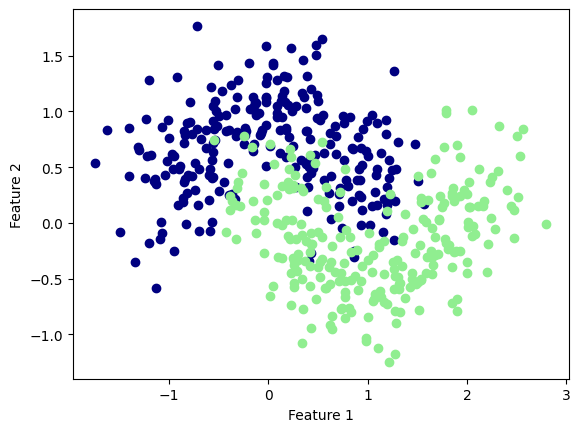

In [3]:
# plot the data
plt.scatter(x=X[y==0][:,0], y=X[y==0][:,1], c='navy')
plt.scatter(x=X[y==1][:,0], y=X[y==1][:,1], c='lightgreen')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [4]:
# define classifiers - base models
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) #tf.estimator.BoostedTreesClassifier
svm_clf = SVC(gamma="scale", random_state=42,probability=True)


In [ ]:
# keras and tf alternatives

# Create the Random Forest estimator
rf_estimator = tf.estimator.BoostedTreesClassifier(
    feature_columns=feature_columns,
    n_batches_per_layer=1,
    n_trees=100,
    max_depth=6
)

# Create the SVM estimator
svm_estimator = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1),
    n_batches_per_layer=1
)

# Create the Logistic Regression estimator
lr_estimator = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1),
    n_batches_per_layer=1
)


In [6]:


def build_nn():
    model= Sequential([
                       Dense(50,activation='relu',input_shape=[2]),
                       Dense(1,activation='sigmoid')
])
    model.compile(
                optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

`pip install scikeras`

In [7]:
import tensorflow as tf
#tf.keras.layers.Wrapper

#https://adriangb.com/scikeras/stable/migration.html
#keras_clf = tf.keras.layers.Wrapper.scikit_learn.KerasClassifier( build_nn,epochs=500,verbose=False)
#code was migrated to
from scikeras.wrappers import KerasClassifier, KerasRegressor
keras_clf = KerasClassifier( build_nn,epochs=500,verbose=False)

`scikeras.wrappers` is a module provided by the `skikeras` library, which acts as a bridge between the scikit-learn and Keras/TensorFlow ecosystems. It allows you to use Keras/TensorFlow models as scikit-learn estimators, enabling easy integration with scikit-learn's utilities, such as model selection, evaluation, and preprocessing.

The `skikeras.wrappers` module provides two main classes:

1. **`KerasClassifier`**: This class is a scikit-learn compatible wrapper for Keras/TensorFlow classification models. It allows you to use a Keras model for classification tasks, while benefiting from scikit-learn's utilities like cross-validation, model selection, and performance evaluation.

2. **`KerasRegressor`**: This class is a scikit-learn compatible wrapper for Keras/TensorFlow regression models. It allows you to use a Keras model for regression tasks, while leveraging scikit-learn's utilities.

These wrappers work by encapsulating a Keras model within a scikit-learn estimator interface. This means that you can instantiate a `KerasClassifier` or `KerasRegressor` object with your Keras model, and then use it like any other scikit-learn estimator, such as `LogisticRegression` or `RandomForestRegressor`.


In [8]:
keras_clf._estimator_type = "classifier"

In [9]:
voting = VotingClassifier(
             estimators=[('lr', log_clf),
                         ('rf', rnd_clf),
                         ('svc', svm_clf),
                         ('keras',keras_clf)], 
             voting='soft',
             flatten_transform=True)

**voting{‘hard’, ‘soft’}, default=’hard’**
 
- If ‘hard’, uses predicted class labels for majority rule voting. 
- If ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.



In [10]:
#traina nd evaluate classifieres 
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('keras',
                              KerasClassifier(epochs=500, model=<function build_nn at 0x2c3fc4900>, verbose=False))],
                 voting='soft')

- Consider voting with VotingClassifier and estimator
- The first is LogisticRegression, the second is RandomForest, the third is SVM, the fourth is KerasClassifier, and the fifth is VotingClassifier.

In [11]:
# evaluation
for clf in (log_clf, rnd_clf, svm_clf, keras_clf, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
KerasClassifier 0.872
VotingClassifier 0.912


In [12]:
df = pd.read_csv('datasets/pima-indians-diabetes.txt', header=None)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) #tf.estimator.BoostedTreesClassifier
svm_clf = SVC(gamma="scale", random_state=42,probability=True)
svm_clf = SVC(gamma="rbf", random_state=42,probability=True)



In [15]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

def build_nn():
    model= Sequential([
                       Dense(50,activation='relu',input_shape=[7]), # or use length function
                       Dense(1,activation='sigmoid')
])
    model.compile(
                optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [16]:
import tensorflow as tf
#tf.keras.layers.Wrapper

#https://adriangb.com/scikeras/stable/migration.html
#keras_clf = tf.keras.layers.Wrapper.scikit_learn.KerasClassifier( build_nn,epochs=500,verbose=False)
#code was migrated to
from scikeras.wrappers import KerasClassifier, KerasRegressor
keras_clf = KerasClassifier( build_nn,epochs=200)

In [17]:
keras_clf._estimator_type = "classifier"

In [18]:
voter = VotingClassifier(
             estimators=[('lr', log_clf),
                         ('rf', rnd_clf),
                         ('svc', svm_clf),
                         ('keras',keras_clf)], 
             voting='soft',
             flatten_transform=True)

In [19]:
X = df.iloc[:,:7]
y = df.iloc[:,8]

In [20]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.25)

In [21]:
voter.fit(X_train,y_train)

Epoch 1/200
18/18 [==============================] - 0s 594us/step - loss: 12.7720 - accuracy: 0.3663
Epoch 2/200
18/18 [==============================] - 0s 498us/step - loss: 3.6586 - accuracy: 0.5347
Epoch 3/200
18/18 [==============================] - 0s 446us/step - loss: 1.8896 - accuracy: 0.5347
Epoch 4/200
18/18 [==============================] - 0s 504us/step - loss: 1.2824 - accuracy: 0.5556
Epoch 5/200
18/18 [==============================] - 0s 438us/step - loss: 0.9189 - accuracy: 0.5503
Epoch 6/200
18/18 [==============================] - 0s 492us/step - loss: 0.7580 - accuracy: 0.6094
Epoch 7/200
18/18 [==============================] - 0s 417us/step - loss: 0.7528 - accuracy: 0.6528
Epoch 8/200
18/18 [==============================] - 0s 463us/step - loss: 0.7069 - accuracy: 0.6510
Epoch 9/200
18/18 [==============================] - 0s 455us/step - loss: 0.6871 - accuracy: 0.6701
Epoch 10/200
18/18 [==============================] - 0s 353us/step - loss: 0.7066 - accur

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('keras',
                              KerasClassifier(epochs=200, model=<function build_nn at 0x2c67d0180>))],
                 voting='soft')